# Sec1


In [5]:
import tensorflow as tf
import time
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
%matplotlib inline

print(tf.__version__)

2.2.0


In [2]:
import os
if "aesthetix.py" not in os.popen("ls").read():
  !wget https://raw.githubusercontent.com/Stellarator-X/ConvoBot/servus/Programming%20Assignments/Speech%20Recognition/ds_utils/aesthetix.py
import numpy as np 
from sklearn.model_selection import train_test_split
import aesthetix as at

# Downloading movie_lines
if "movie_lines.txt" not in os.popen("ls").read():
  !wget https://raw.githubusercontent.com/Stellarator-X/ConvoBot/servus/Programming%20Assignments/Response%20Generation/movie_lines.txt

movielines = open("movie_lines.txt", mode='r')
print(movielines)
lines = movielines.readlines()
print(len(lines))

def clean_str(_str):
  _str = _str.strip()
  _str = _str.lower()
  _str = _str.replace(".", "")
  _str = _str.replace(",", "")
  _str = _str.replace("?", "")
  _str = _str.replace("!", "")
  _str = _str.replace(":", "")
  _str = _str.replace(">", "")
  _str = _str.replace("<", "")
  _str = _str.replace("-", " ")
  _str = _str.replace("_", " ")
  _str = _str.replace("\\", "")
  _str = _str.replace("  ", " ")
  return _str



--2020-06-22 13:48:07--  https://raw.githubusercontent.com/Stellarator-X/ConvoBot/servus/Programming%20Assignments/Speech%20Recognition/ds_utils/aesthetix.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1212 (1.2K) [text/plain]
Saving to: ‘aesthetix.py’

aesthetix.py        100%[===================>]   1.18K  --.-KB/s    in 0s      

2020-06-22 13:48:08 (65.3 MB/s) - ‘aesthetix.py’ saved [1212/1212]

--2020-06-22 13:48:14--  https://raw.githubusercontent.com/Stellarator-X/ConvoBot/servus/Programming%20Assignments/Response%20Generation/movie_lines.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... conn

In [ ]:
sample_size = 40000
cleanlines = []
for i, line in enumerate(lines[:sample_size]):
  at.progress_bar("Cleaning the lines", i, len(lines[:sample_size]))
  speaker, line = line.split('+++$+++ ')[-2:]
  cleanlines.append([speaker.split(" ")[0], line.split('\n')[0]])

cleanlines.reverse()
cleanlines = np.array(cleanlines)
for line in cleanlines[:10]:
  print(line[0],":",line[1])


# Forming the dataset 
response_data = []
l = len(cleanlines)-1
for i, line in enumerate(cleanlines[:-1]):
  at.progress_bar("Generating Stimulus-Response Pairs", i, l)
  speaker, utterance = line
  next_speaker, next_utterance = cleanlines[i+1]
  if speaker is not next_speaker:
    response_data.append(np.array(["<start> "+clean_str(utterance)+" <end>", "<start> "+clean_str(next_utterance)+" <end>"]))
  
response_data = np.array(response_data)
print(response_data.shape)
print(response_data[-10:])

Generating Stimulus-Response Pairs:[==============================](99.04%)  

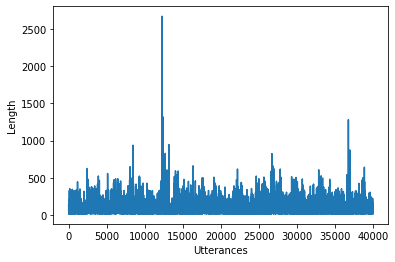

66.12372809320233
Longest utterance :  <start> shit o dear that's enough to make me asthmatic the nerve of those twits what do they know about female odor don't interrupt here's my concept my ranch out west it's a beauty ranch oh it's got a few head of cattle for atmosphere and tax purposes but it's a beauty ranch a place where unhappy women  divorcees and widows mainly  can go to lose weight remove wrinkles change their hair styles and pretty themselves up for the next disappointment my ranch is named the rubber rose after the rubber rose douche bag my own invention and bless its little red bladder the most popular douche bag in the world so get this it's on the migratory flight path of the whooping cranes the last flock of wild whooping cranes left in existence well these cranes stop off at my little pond  siwash lake it's called  twice a year autumn and spring and spend a few days each time resting up eating doing whatever whooping cranes do i've never seen them understand but i hea

In [6]:
a = [len(s) for s in response_data[:,0]]
plt.plot(a)
plt.xlabel("Utterances")
plt.ylabel("Length")
plt.show()
print(np.mean(np.array(a)))
print("Longest utterance : ", response_data[np.argmax(a), 0])

In [31]:
# Preprocessing the Data
from tensorflow.keras.preprocessing.text import Tokenizer, tokenizer_from_json
from tensorflow.keras.preprocessing.sequence import pad_sequences

oov_token = "<OOV>"
max_length = 25
stimuli = response_data[:, 0]
responses = response_data[:, 1]

# tokenizer = Tokenizer(oov_token=oov_token, filters = "")
# tokenizer.fit_on_texts(stimuli)
with open("Tokens.txt") as file:
  json_string = file.read()
tokenizer = tokenizer_from_json(json_string)

word_index = tokenizer.word_index
index_word = {word_index[word]:word for word in word_index}
vocab_size = len(word_index)
stimulus_sequences = tokenizer.texts_to_sequences(stimuli)
response_sequences = tokenizer.texts_to_sequences(responses)

padded_stimulus_sequences = pad_sequences(stimulus_sequences, maxlen = max_length ,padding = 'post', truncating = 'post')
padded_response_sequences = pad_sequences(response_sequences, maxlen = max_length, padding = 'post', truncating = 'post')


In [8]:
json_string = tokenizer.to_json()
with open("Tokens.txt", "w") as file:
  file.write(json_string)

In [ ]:
json_string

'{"class_name": "Tokenizer", "config": {"num_words": null, "filters": "", "lower": true, "split": " ", "char_level": false, "oov_token": "<OOV>", "document_count": 19999, "word_counts": "{\\"<start>\\": 19999, \\"sir\\": 214, \\"i\\": 6318, \\"come\\": 385, \\"to\\": 5096, \\"beg\\": 15, \\"you\\": 8322, \\"confess\\": 8, \\"all\\": 961, \\"and\\": 2785, \\"swear\\": 33, \\"allegiance\\": 2, \\"the\\": 6037, \\"king\\": 20, \\"that\\": 2145, \\"he\\": 1348, \\"might\\": 111, \\"show\\": 123, \\"mercy\\": 9, \\"<end>\\": 19999, \\"will\\": 459, \\"my\\": 1485, \\"country\\": 29, \\"take\\": 346, \\"back\\": 373, \\"his\\": 496, \\"soldiers\\": 8, \\"let\\": 304, \\"us\\": 366, \\"rule\\": 10, \\"ourselves\\": 7, \\"is\\": 1991, \\"die\\": 53, \\"quickly\\": 13, \\"perhaps\\": 36, \\"even\\": 178, \\"live\\": 68, \\"in\\": 2170, \\"tower\\": 15, \\"time\\": 367, \\"who\\": 488, \\"knows\\": 75, \\"what\\": 1947, \\"can\\": 700, \\"happen\\": 41, \\"if\\": 806, \\"only\\": 274, \\"him\\":

In [32]:
def encode_texts(str_list, tokenizer=tokenizer, max_length = max_length):
  # print(str_list)
  str_list = ["<start> " + s + " <end>" for s in str_list]
  seq = tokenizer.texts_to_sequences(str_list)
  pad_seq = pad_sequences(seq, max_length, padding  ='post', truncating='post')
  return pad_seq

def decode_seq(seq_list, tokenizer = tokenizer):
  ret = tokenizer.sequences_to_texts(seq_list)
  ret = [s.split("<start>")[1].split("<end>")[0][1:-1] for s in ret]
  return np.array(ret)

print(encode_texts(['hello there', 'bye']))

print(decode_seq(encode_texts(['hello there', 'bye'])))

[[   2  341   61    3    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0]
 [   2 1017    3    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0]]
['hello there' 'bye']


In [33]:
X_train,  y_train, X_test,  y_test = train_test_split(padded_stimulus_sequences, padded_response_sequences, test_size = 0.2)

In [34]:
# Creating a tf dataset
BUFFER_SIZE = len(X_train)
BATCH_SIZE = 100
steps_per_epoch = BUFFER_SIZE//BATCH_SIZE
embedding_dim = 100
units = 1000

dataset = tf.data.Dataset.from_tensor_slices((X_train, X_test)).shuffle(BUFFER_SIZE)
dataset = dataset.batch(BATCH_SIZE, drop_remainder = True)


In [35]:
example_input_batch, example_target_batch = next(iter(dataset))
example_input_batch.shape, example_target_batch.shape

(TensorShape([100, 25]), TensorShape([100, 25]))

In [36]:
# Getting the trained GloVe embeddings

!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/glove.6B.100d.txt \
    -O /tmp/glove.6B.100d.txt
embeddings_index = {};
with open('/tmp/glove.6B.100d.txt') as f:
    for line in f:
        values = line.split();
        word = values[0];
        coefs = np.asarray(values[1:], dtype='float32');
        embeddings_index[word] = coefs;

embeddings_matrix = np.zeros((vocab_size+1, embedding_dim));
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word);
    if embedding_vector is not None:
        embeddings_matrix[i] = embedding_vector;

--2020-06-22 14:14:04--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/glove.6B.100d.txt
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.23.128, 2404:6800:4008:c03::80
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.23.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 347116733 (331M) [text/plain]
Saving to: ‘/tmp/glove.6B.100d.txt’

/tmp/glove.6B.100d. 100%[===================>] 331.04M   193MB/s    in 1.7s    

2020-06-22 14:14:06 (193 MB/s) - ‘/tmp/glove.6B.100d.txt’ saved [347116733/347116733]



In [14]:
from tensorflow.keras.layers import Embedding, GRU, Dense


In [37]:
# The encoder and Decoder Models

class Encoder(tf.keras.Model):
  
  def __init__(self, vocab_size, embedding_dim, encoder_units, batch_size):
    super(Encoder, self).__init__()
    self.batch_size = batch_size
    self.encoder_units = encoder_units
    self.embedding = Embedding(vocab_size, embedding_dim, weights=[embeddings_matrix], trainable=False)
    self.gru = GRU(self.encoder_units, return_sequences = True, return_state=True, recurrent_initializer='glorot_uniform')

  def call(self, x, hidden):
    x = self.embedding(x)
    output, state = self.gru(x, initial_state = hidden)
    return output, state
  
  def initialize_hidden_state(self):
    return tf.zeros((self.batch_size, self.encoder_units))

In [38]:
encoder = Encoder(vocab_size+1, embedding_dim, units, BATCH_SIZE)
sample_hidden = encoder.initialize_hidden_state()
print(sample_hidden.shape)
sample_out, sample_hidden = encoder(example_input_batch,sample_hidden)
print(sample_out.shape, sample_hidden.shape)

(100, 1000)
(100, 25, 1000) (100, 1000)


In [39]:
class AttentionLayer(tf.keras.layers.Layer):
  
  def __init__(self, units):
    super(AttentionLayer, self).__init__()
    self.W1 = Dense(units)
    self.W2 = Dense(units)
    self.V = Dense(1, activation='tanh')
  
  def call(self, query, values):
    # query hidden state shape == (batch_size, hidden size) 
    # query_with_time_axis shape == (batch_size, 1, hidden size)
    
    # assert values.shape == (batch_size, max_len, hidden size)
    
    # we need to broadcast addition along the time axis to calculate the score
    
    query_with_time_axis = tf.expand_dims(query, 1)

    score = self.V(self.W1(query_with_time_axis)+self.W2(values))

    attention_weights = tf.nn.softmax(score, axis =1)

    context_vector = attention_weights*values
    context_vector = tf.reduce_sum(context_vector, axis  = 1)

    return context_vector, attention_weights
    

In [40]:
attention_layer = AttentionLayer(10)
attention_result, attention_weights = attention_layer(sample_hidden, sample_out)

print(attention_result.shape)
print(attention_weights.shape)

(100, 1000)
(100, 25, 1)


In [41]:
# The decoder model

class Decoder(tf.keras.Model):

  def __init__(self, vocab_size, embedding_dim, decoder_units, batch_size):
    super(Decoder, self).__init__()
    self.batch_size = batch_size
    self.vocab_size= vocab_size
    self.decoder_units = decoder_units
    self.embedding = Embedding(vocab_size, embedding_dim, weights=[embeddings_matrix], trainable=False)
    self.gru = GRU(self.decoder_units, return_sequences=True, return_state=True, recurrent_initializer='glorot_uniform')

    self.FC = Dense(self.vocab_size)
    self.attention = AttentionLayer(self.decoder_units)

  def call(self, x, hidden, encoder_output):
    context_vector, attention_weights = self.attention(hidden, encoder_output)
    x = self.embedding(x)
    x = tf.concat([tf.expand_dims(context_vector, 1), x], axis = -1)

    output, state = self.gru(x)

    output = tf.reshape(output, (-1, output.shape[2]))

    x = self.FC(output)

    return x, state, attention_weights
  

In [42]:
decoder = Decoder(vocab_size+1, embedding_dim, units, BATCH_SIZE)

sample_decoder_output, _, _ = decoder(tf.random.uniform((BATCH_SIZE, 1)),
                                      sample_hidden, sample_out)

print (f'Decoder output shape: (batch_size, vocab size) {sample_decoder_output.shape}')

Decoder output shape: (batch_size, vocab size) (100, 13357)


In [43]:
# Defining the optimizer and loss functions
optimizer = tf.keras.optimizers.Adam()

loss_object = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True, reduction='none')

def loss_function(real, pred):
  mask = tf.math.logical_not(tf.math.equal(real, 0))
  loss = loss_object(real, pred)
  mask = tf.cast(mask, dtype=loss.dtype)
  loss *= mask
  return tf.reduce_mean(loss)

In [ ]:
# Defining checkpoint variables
checkpoint_dir = './training_checkpoints'
checkpoint_prefix = os.path.join(checkpoint_dir, "ckpt")
checkpoint = tf.train.Checkpoint(optimizer=optimizer, encoder=encoder, decoder=decoder)

In [23]:
assert word_index['<start>'] != word_index['start']

In [46]:
# Training Pipeline

@tf.function
def train_step(inp, target, encoder_hidden):
  loss = 0

  with tf.GradientTape() as tape:
    encoder_output, encoder_hidden = encoder(inp, encoder_hidden)

    decoder_hidden = encoder_hidden

    decoder_input = tf.expand_dims([word_index['<start>']]*BATCH_SIZE, 1)

    # Teacher forcing; feeding the target as the next input
    for t in range(1, target.shape[1]): 
      predictions, decoder_hidden, _ = decoder(decoder_input, decoder_hidden, encoder_output)

      loss += loss_function(target[:, t], predictions)

      decoder_input = tf.expand_dims(target[:, t], 1)

  batch_loss = (loss/int(target.shape[1]))

  variables = encoder.trainable_variables + decoder.trainable_variables
  gradients = tape.gradient(loss, variables)

  optimizer.apply_gradients(zip(gradients, variables))

  return batch_loss
  


In [ ]:
!rm -r training_checkpoints

In [26]:
!cp -r "/content/drive/My Drive/Colab Notebooks/training_checkpoints" training_checkpoints

In [45]:
# Restore from last checkpoint 
checkpoint.restore(tf.train.latest_checkpoint(checkpoint_dir))

In [47]:
epochs = 50
loss_hist = []
print(f"Training on {BUFFER_SIZE//BATCH_SIZE} batches : ")
for epoch in range(1, epochs+1):
  start = time.time()
  encoder_hidden = encoder.initialize_hidden_state()
  total_loss = 0
  disp_loss = 0
  batch_loss = 0
  for batch, (inp, target) in enumerate(dataset.take(steps_per_epoch)):
    at.progress_bar(f"Epoch {epoch}/{epochs} ", batch, steps_per_epoch, output_vals = {'Loss':disp_loss})
    batch_loss = train_step(inp, target, encoder_hidden)
    total_loss += batch_loss
    disp_loss = total_loss/(max(1, batch))
  total_loss = total_loss / steps_per_epoch
  loss_hist.append(total_loss)

  if (epoch + 1) % 10 == 0:
    checkpoint.save(file_prefix = checkpoint_prefix)


Training on 319 batches : 
Epoch 1/50 :[==============================](100.00%)  Loss : 1.92 
Epoch 2/50 :[==============================](100.00%)  Loss : 1.71 
Epoch 3/50 :[==============================](100.00%)  Loss : 1.57 
Epoch 4/50 :[==============================](100.00%)  Loss : 1.47 
Epoch 5/50 :[==============================](100.00%)  Loss : 1.38 
Epoch 6/50 :[==============================](100.00%)  Loss : 1.30 
Epoch 7/50 :[==============================](100.00%)  Loss : 1.24 
Epoch 8/50 :[==============================](100.00%)  Loss : 1.18 
Epoch 9/50 :[==============================](100.00%)  Loss : 1.12 
Epoch 10/50 :[==============================](100.00%)  Loss : 1.09 
Epoch 11/50 :[==============================](100.00%)  Loss : 1.04 
Epoch 12/50 :[==============================](100.00%)  Loss : 1.02 
Epoch 13/50 :[==============================](100.00%)  Loss : 0.95 
Epoch 14/50 :[==============================](100.00%)  Loss : 0.91 
Epoch 15/50 :[==

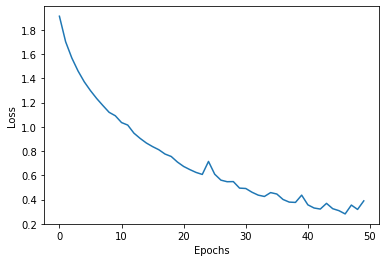

In [48]:
plt.plot(loss_hist)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

In [49]:
!rm -r training_checkpoints

In [50]:
checkpoint.save(file_prefix = checkpoint_prefix)

'./training_checkpoints/ckpt-16'

In [52]:
!cp -r training_checkpoints "/content/drive/My Drive/Colab Notebooks/training_checkpoints2"

In [79]:
def evaluate(sentence):
  attention_plot = np.zeros((max_length, max_length))

  inputs = encode_texts([sentence])
  inputs = tf.convert_to_tensor(inputs)

  result = ''

  hidden = [tf.zeros((1, units))]

  encoder_output, encoder_hidden = encoder(inputs, hidden)

  decoder_hidden = encoder_hidden
  decoder_input = tf.expand_dims([word_index['<start>']], 0)

  for t in range(max_length):
    predictions, decoder_hidden, attention_weights = decoder(decoder_input, decoder_hidden, encoder_output)

    # Storing the attention weights to plot later
    attention_weights = tf.reshape(attention_weights, (-1, ))
    attention_plot[t] = attention_weights.numpy()
    # print(predictions.shape)
    # input()
    predicted_id = tf.argmax(predictions[0]).numpy()

    result += index_word[predicted_id]+' '

    if index_word[predicted_id]=='<end>':
      return result, sentence, attention_plot
    
    decoder_input = tf.expand_dims([predicted_id], 0)

  return result, sentence, attention_plot



In [80]:
# Plotting attention weights
import matplotlib.ticker as ticker
def plot_attention(attention, sentence, predicted_sentence):
  fig = plt.figure(figsize=(10,10))
  ax = fig.add_subplot(1, 1, 1)
  ax.matshow(attention, cmap='viridis')

  fontdict = {'fontsize': 14}

  ax.set_xticklabels([''] + sentence, fontdict=fontdict, rotation=90)
  ax.set_yticklabels([''] + predicted_sentence, fontdict=fontdict)

  ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
  ax.yaxis.set_major_locator(ticker.MultipleLocator(1))

  plt.show()

In [81]:
def get_response(sentence, plot_graph = False):
  result, sentence, attention_plot = evaluate(sentence)

  print('Input: %s' % (sentence))
  print('Predicted Response: {}'.format(result))

  attention_plot = attention_plot[:len(result.split(' ')), :len(sentence.split(' '))]
  if plot_graph :plot_attention(attention_plot, sentence.split(' '), result.split(' '))

In [141]:
get_response("who are you")

Input: who are you
Predicted Response: i brought the girl remember <end> 


In [83]:
get_response("I was banned from the club's page")

Input: I was banned from the club's page
Predicted Response: for magazines <end> 


In [85]:
get_response("i will kill you")

Input: i will kill you
Predicted Response: just want to <end> 


In [188]:
# Restore from last checkpoint 
checkpoint.restore(tf.train.latest_checkpoint(checkpoint_dir))

In [ ]:
!zip -r training_checkpoints.zip training_checkpoints

  adding: training_checkpoints/ (stored 0%)
  adding: training_checkpoints/ckpt-10.data-00001-of-00002 (deflated 14%)
  adding: training_checkpoints/checkpoint (deflated 38%)
  adding: training_checkpoints/ckpt-10.index (deflated 69%)
  adding: training_checkpoints/ckpt-10.data-00000-of-00002 (deflated 23%)


In [ ]:
!rm training_checkpoints.zip

In [ ]:
!tar -zcvf training_checkpoints.tar.gz training_checkpoints

training_checkpoints/
training_checkpoints/ckpt-10.data-00001-of-00002
training_checkpoints/checkpoint
training_checkpoints/ckpt-10.index
training_checkpoints/ckpt-10.data-00000-of-00002


In [ ]:
!mv training_checkpoints "/content/drive/My Drive/Colab Notebooks"

In [187]:
!cp -r "/content/drive/My Drive/Colab Notebooks/training_checkpoints" training_checkpoints

In [184]:
!ls "/content/drive/My Drive/Colab Notebooks"

'Copy of DeepSpeech'	 ResponseGeneration_tf_keras.ipynb   Untitled.ipynb
 DeploymentTests.ipynb	 training_checkpoints
 RespGen.ipynb		 training_checkpoints2


In [163]:
def argmax_beam(tensor, width):
  arr = tensor.numpy()
  assert arr.shape[0] == 1
  arr_ = [c for c in arr[0]]
  assert len(arr_) >= width, "Beam width is greater than the tensor length"
  args = []
  for i in range(width):
    argm = np.argmax(arr_)
    args.append(argm)
    arr_[argm] = -np.inf
  # print(args)
  # input()
  return args

In [86]:
a = np.random.randn(1, 5)
print(a)
a = tf.convert_to_tensor(a)
b = np.random.randn(1, 5)
print(b)
b = tf.convert_to_tensor(b)
# print([*argmax_beam(a, 3), *argmax_beam(b, 3)])
c = tf.convert_to_tensor([[1, 2, 3]])
print(argmax_beam(c, 2))

[[-0.45864993  0.38742912 -0.63793097  0.19780451 -0.43321653]]
[[ 0.05163599 -0.10403681 -1.60924486  0.1025608  -1.38739876]]
[2, 1]


In [278]:
def beam_search_evaluate(sentence, beam_width=3, length_norm_alpha = 0.5):
  inputs = encode_texts([sentence])
  inputs = tf.convert_to_tensor(inputs)
  result = ['']*beam_width
  results = []
  scores_list = []
  scores = [0]*beam_width
  hidden = [tf.zeros((1, units))]
  encoder_output, encoder_hidden = encoder(inputs, hidden)
  decoder_hidden = encoder_hidden
  decoder_input = tf.expand_dims([word_index['<start>']], 0)
  
  # At t = 0
  prediction, decoder_hidden, _ = decoder(decoder_input, decoder_hidden, encoder_output)
  ids = argmax_beam(prediction, beam_width)
  predicted_id = []
  for i, id in enumerate(ids):
    result[i]+= index_word[id] + " "
    predicted_id.append(id)
  decoder_input = []
  for i in range(beam_width) : 
      decoder_input.append(tf.expand_dims([predicted_id[i]], 0))
  decoder_hidden = [decoder_hidden]*beam_width

  # After t=0  
  for t in range(1, max_length):
    predictions = []
    
    for i in range(beam_width):
      pred, decoder_hidden[i], _ = decoder(decoder_input[i], decoder_hidden[i], encoder_output)
      predictions.append(pred)
    ids = [] # List of tuples : (id, predicted probability, decoder_hidden from beam)
    
    for beam in range(beam_width):
      predicted_ids = argmax_beam(predictions[beam], beam_width)
      for id in predicted_ids:
        ids.append((id, predictions[beam][0,id],decoder_hidden[beam], result[beam])) 
    
    probs = tf.convert_to_tensor([[i[1] for i in ids]])
    best_id_indices = argmax_beam(probs, beam_width)
    predicted_id = []

    for i, idx in enumerate(best_id_indices):
      pr_id, score, decoder_hidden[i], result[i] = ids[idx]
      result[i] += index_word[pr_id] + " "
      predicted_id.append(pr_id)
      scores[i] = np.log(score.numpy())
      

    for i in range(beam_width):
      if index_word[predicted_id[i]]=='<end>':        
        results.append(result[i]) 
        # scores_list.append(scores[i])#*np.log(t))
        
    
    if len(results) == beam_width:
      return results, scores
    
    for i in range(beam_width) : 
      decoder_input[i] = tf.expand_dims([predicted_id[i]], 0)

  return result, scores

In [263]:
def get_response_beam(sentence, beam_width=3):
  responses, scores = beam_search_evaluate(sentence, beam_width)
  print(f"Input : {sentence}")
  print("Responses")
  for r, s in zip(responses, scores):
    print(r.split(" <end>")[0], ": Score = ", s)

In [257]:
index_word[0] = ""

In [301]:
get_response_beam("can i have your permission")

Input : can i have your permission
Responses
yes : Score =  1.4216975
you know : Score =  1.3560187
yes patrick : Score =  1.0248822


In [302]:
get_response("can i have your permission")

Input: can i have your permission
Predicted Response: you know <end> 
